# Tea Survey

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [ ]:

import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from fastdownload import download_url
from IPython.display import display, Image
from aiking.data.external import * #We need to import this after fastai modules

from scipy import stats
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
warnings.filterwarnings("ignore")

## Dataset Review

In [ ]:
list_ds()

(#3) ['oxford-iiit-pet','california-housing-prices','mktr']

In [ ]:
ds = get_ds('mktr')
(ds/"conjoint_analysis"/"tea").ls()

(#6) [Path('/media/sf_gdrive/PPV/S_Personal_Study/aiking/data/mktr/conjoint_analysis/tea/filled_conjoint_survey_tea.csv'),Path('/media/sf_gdrive/PPV/S_Personal_Study/aiking/data/mktr/conjoint_analysis/tea/partwort_utilities.csv'),Path('/media/sf_gdrive/PPV/S_Personal_Study/aiking/data/mktr/conjoint_analysis/tea/importance_ratings.csv'),Path('/media/sf_gdrive/PPV/S_Personal_Study/aiking/data/mktr/conjoint_analysis/tea/segmentation_level_partworths.csv'),Path('/media/sf_gdrive/PPV/S_Personal_Study/aiking/data/mktr/conjoint_analysis/tea/segmentation_importance_ratings.csv'),Path('/media/sf_gdrive/PPV/S_Personal_Study/aiking/data/mktr/conjoint_analysis/tea/respondent_demographic_sample.csv')]

In [ ]:
path = (ds/"conjoint_analysis"/"tea")
data = pd.read_csv(path/"filled_conjoint_survey_tea.csv")
data

profile  price_per_kg variety        kind aroma  res1  res2  res3  res4  \
0    profile1           250   black        bags   yes     8     0     4     6   
1    profile2           500   green        bags   yes     1    10    10     7   
2    profile3           250     red        bags   yes     1     3     3     4   
3    profile4           750   black  granulated   yes     3     5     5     9   
4    profile5           500     red  granulated   yes     9     1     4     6   
5    profile6           500   black       leafy   yes     2     4     1     3   
6    profile7           750   green       leafy   yes     7     8     2     7   
7    profile8           250     red       leafy   yes     2     6     0     4   
8    profile9           500   black        bags    no     2     2     0     8   
9   profile10           750     red        bags    no     2     9     1     5   
10  profile11           250   green  granulated    no     2     7     8     2   
11  profile12           250   black       leafy    no     3     5     9    10   
12  profile13           500     red       leafy    no     4     2     7     9   

    res5  ...  res91  res92  res93  res94  res95  res96  res97  res98  res99  \
0      5  ...      3      9      5      9     10      8      5      5      7   
1      1  ...      7      3      4      3      8      9      3      3      4   
2      7  ...      5      3      8      3      0      2      0      1      3   
3      8  ...      5      5      1      5      0      6      9      4      9   
4      6  ...      3      1      2      0      2      6      0      3      0   
5     10  ...      5      2      2      4      0      2      8      8      5   
6      7  ...      3      0      4      0      0      1      0      5      4   
7     10  ...      9      0      3      0      0      2      0      9      0   
8      6  ...      3      1      3      4      0      2      6      6      5   
9      6  ...      9      0      1      0      0      2      0      8      0   
10     6  ...      5      0      2      6      0      7      9      4      6   
11    10  ...      4      2      8      2      6      6      2      3     10   
12     7  ...      4      1      6      0      3      6      0      1      8   

    res100  
0        9  
1        7  
2        4  
3       10  
4        9  
5        3  
6        2  
7        1  
8        2  
9        3  
10       9  
11      10  
12       8  

[13 rows x 105 columns]

In [ ]:
pdt_attributes = ['price_per_kg', 'variety', 'kind', 'aroma']
profiles = ['profile']

In [ ]:
resps = data.columns.difference(list(pdt_attributes+profiles)); resps

Index(['res1', 'res10', 'res100', 'res11', 'res12', 'res13', 'res14', 'res15',
       'res16', 'res17', 'res18', 'res19', 'res2', 'res20', 'res21', 'res22',
       'res23', 'res24', 'res25', 'res26', 'res27', 'res28', 'res29', 'res3',
       'res30', 'res31', 'res32', 'res33', 'res34', 'res35', 'res36', 'res37',
       'res38', 'res39', 'res4', 'res40', 'res41', 'res42', 'res43', 'res44',
       'res45', 'res46', 'res47', 'res48', 'res49', 'res5', 'res50', 'res51',
       'res52', 'res53', 'res54', 'res55', 'res56', 'res57', 'res58', 'res59',
       'res6', 'res60', 'res61', 'res62', 'res63', 'res64', 'res65', 'res66',
       'res67', 'res68', 'res69', 'res7', 'res70', 'res71', 'res72', 'res73',
       'res74', 'res75', 'res76', 'res77', 'res78', 'res79', 'res8', 'res80',
       'res81', 'res82', 'res83', 'res84', 'res85', 'res86', 'res87', 'res88',
       'res89', 'res9', 'res90', 'res91', 'res92', 'res93', 'res94', 'res95',
       'res96', 'res97', 'res98', 'res99'],
      dtype='obj

In [ ]:
attr_levels = {i:data[i].unique() for i in pdt_attributes}; attr_levels

{'price_per_kg': array([250, 500, 750]),
 'variety': array(['black', 'green', 'red'], dtype=object),
 'kind': array(['bags', 'granulated', 'leafy'], dtype=object),
 'aroma': array(['yes', 'no'], dtype=object)}

In [ ]:
data[profiles+list(resps)].set_index('profile').T.describe().T

count  mean       std  min   25%  50%   75%   max
profile                                                     
profile1   100.0  5.99  3.270607  0.0  4.00  7.0  8.25  10.0
profile2   100.0  4.17  3.455504  0.0  1.00  3.0  7.00  10.0
profile3   100.0  2.68  2.273608  0.0  1.00  2.5  4.00  10.0
profile4   100.0  4.73  3.011275  0.0  2.75  5.0  6.50  10.0
profile5   100.0  3.55  3.182576  0.0  1.00  2.0  6.00   9.0
profile6   100.0  3.36  2.642007  0.0  2.00  3.0  5.00  10.0
profile7   100.0  2.53  2.572013  0.0  0.00  2.0  4.00   8.0
profile8   100.0  2.40  2.759739  0.0  0.00  2.0  3.00  10.0
profile9   100.0  2.55  2.253505  0.0  1.00  2.0  4.00   8.0
profile10  100.0  2.35  2.668087  0.0  0.00  2.0  3.00   9.0
profile11  100.0  4.45  2.709411  0.0  2.00  4.0  6.00  10.0
profile12  100.0  5.01  3.625095  0.0  1.75  4.0  9.00  10.0
profile13  100.0  3.79  3.009396  0.0  1.00  3.5  6.00   9.0

```{note}
Above table describes average rating for 13 different profiles for the product by 100 respondents
```

In [ ]:
ratings = np.array(data[resps])
ratings.min(), ratings.max(), ratings.mean(), ratings.std()

(0, 10, 3.6584615384615384, 3.101160691279331)

<AxesSubplot:ylabel='Count'>

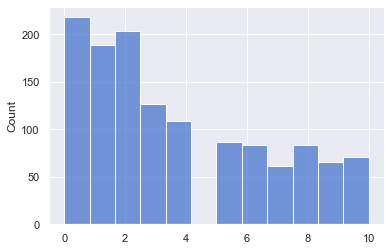

In [ ]:
sns.histplot(np.ravel(ratings))